In [1]:
using DifferentialEquations
using Plots

# 常微分方程式を解くための関数
function solve_ode(f::Function, u0, tspan, params=())
    """
    常微分方程式を解くための汎用関数
    
    引数:
    - f: 微分方程式の右辺を定義する関数
    - u0: 初期条件
    - tspan: 計算する時間区間 (開始時間, 終了時間)
    - params: オプションのパラメータ
    
    返り値:
    - sol: 解のオブジェクト
    """
    # 問題の定義
    prob = ODEProblem(f, u0, tspan, params)
    
    # 数値解法で解く
    sol = solve(prob, Tsit5())
    
    return sol
end

# 例: 単純な1階線形微分方程式 dy/dt = -2y
function linear_ode(du, u, p, t)
    du[1] = -2 * u[1]
end

# 例: 単振動方程式 d²x/dt² + ω²x = 0
function harmonic_oscillator(du, u, p, t)
    ω = p[1]  # 角周波数
    du[1] = u[2]
    du[2] = -ω^2 * u[1]
end

# 使用例
function main()
    # 線形微分方程式の解
    u0_linear = [1.0]  # 初期値
    tspan_linear = (0.0, 5.0)  # 時間範囲
    sol_linear = solve_ode(linear_ode, u0_linear, tspan_linear)
    
    # 単振動方程式の解
    u0_harmonic = [1.0, 0.0]  # 初期位置と速度
    tspan_harmonic = (0.0, 10.0)
    ω = 2.0  # 角周波数
    sol_harmonic = solve_ode(harmonic_oscillator, u0_harmonic, tspan_harmonic, (ω,))
    
    # プロット
    plot(sol_linear, title="linear ode", label="y")
    savefig("linear_ode.png")
    
    plot(sol_harmonic, title="simple", label=["pos" "vel"])
    savefig("harmonic_oscillator.png")
end

# スクリプト実行
main()

"/home/jovyan/work/harmonic_oscillator.png"

In [2]:
import Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.9/Project.toml`
  No Changes to `/opt/julia/environments/v1.9/Manifest.toml`


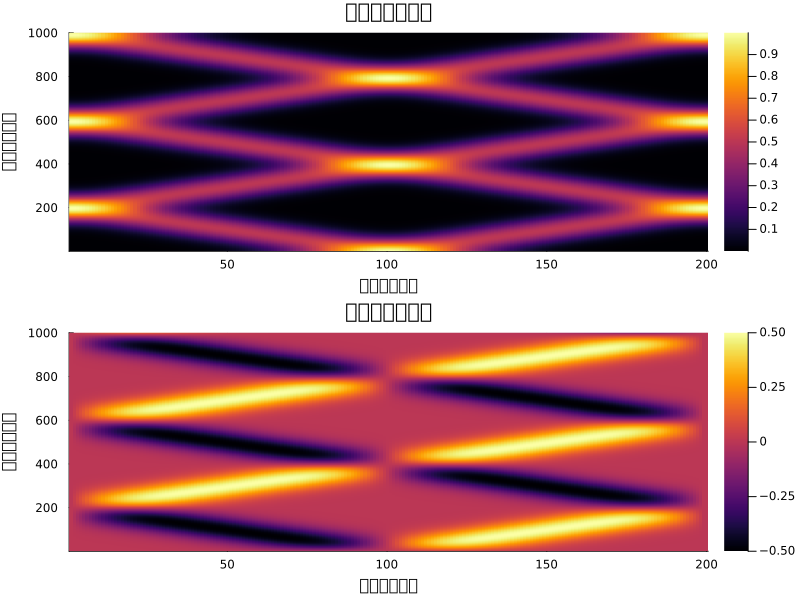

GKS: glyph missing from current font: 38651
GKS: glyph missing from current font: 22580
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 30330
GKS: glyph missing from current font: 23637
GKS: glyph missing from current font: 31354
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 12464
GKS: glyph missing from current font: 12522
GKS: glyph missing from current font: 12483
GKS: glyph missing from current font: 12489
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 12486
GKS: glyph missing from current font: 12483
GKS: glyph missing from current font: 12503
GKS: glyph missing from current font: 30913
GKS: glyph missing from current font: 22580
GKS: glyph missing from current font: 12398
GKS: glyph missing from current 

In [3]:
using LinearAlgebra
using SparseArrays
using Plots

# マックスウェル方程式の1次元FDTD（有限差分時間領域）法
function solve_maxwell_1d(;
    length = 1.0,     # 計算領域の長さ
    time_steps = 1000,# 計算ステップ数
    courant = 0.5     # クーラン数
)
    # グリッドのセットアップ
    nx = 200  # 空間グリッドのポイント数
    dx = length / (nx - 1)
    dt = courant * dx  # 時間ステップ

    # 電磁場の初期化
    E = zeros(nx)  # 電場
    H = zeros(nx)  # 磁場

    # 結果を保存する配列
    E_history = zeros(nx, time_steps)
    H_history = zeros(nx, time_steps)

    # 初期条件（ガウシアンパルス）
    σ = 0.1
    x0 = length / 2
    for i in 1:nx
        x = (i-1) * dx
        E[i] = exp(-((x - x0)^2 / (2 * σ^2)))
    end

    # FDTD法による計算
    for t in 1:time_steps
        # 磁場の更新（空間微分）
        for i in 1:(nx-1)
            H[i] = H[i] - (dt / dx) * (E[i+1] - E[i])
        end

        # 電場の更新（空間微分）
        for i in 2:nx
            E[i] = E[i] - (dt / dx) * (H[i] - H[i-1])
        end

        # 境界条件の処理（完全吸収境界条件）
        E[1] = E[2]
        E[end] = E[end-1]

        # 履歴の保存
        E_history[:, t] = E
        H_history[:, t] = H
    end

    return E_history, H_history, dx, dt
end

# シミュレーションの実行
E_hist, H_hist, dx, dt = solve_maxwell_1d()

# 結果の可視化
p1 = heatmap(E_hist', title="電場の時間発展", 
             xlabel="空間グリッド", ylabel="時間ステップ")
p2 = heatmap(H_hist', title="磁場の時間発展", 
             xlabel="空間グリッド", ylabel="時間ステップ")

plot(p1, p2, layout=(2,1), size=(800,600))